In [35]:
from datasets import load_dataset
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm  # Progress bar for Jupyter Notebooks
import numpy as np
from datasets import Dataset, load_from_disk
from torch.utils.data import DataLoader
import random

In [ ]:
??datasets

In [30]:
from datasets import load_dataset

ds = load_dataset("Ritvik19/Sudoku-Dataset")

In [ ]:
# Check the dataset keys (usually 'train', 'test', etc.)
print(ds.keys())

# Access the training data
train_data = ds['train']
valid_data = ds['validation']
# Display the first sample
print(train_data[0],'\n',valid_data[0])


In [ ]:
print(train_data.shape,
     '\n',
      valid_data.shape)


In [ ]:


Dataset.from_dict({"train_data": train_data}).save_to_disk("my_dataset/train")
Dataset.from_dict({"valid_data": valid_data}).save_to_disk("my_dataset/valid")
ds = load_from_disk("my_dataset").with_format("torch")
dataloader = DataLoader(ds, batch_size=32, num_workers=4)

In [ ]:

print(ds.keys())  # Should display the available dataset splits like 'train', 'validation'

# Access the training and validation data
train_data = ds['train']
valid_data = ds['validation']


print(train_data[0], '\n', valid_data[0])

# Save the dataset to disk in separate splits
Dataset.from_dict(train_data).save_to_disk("my_dataset")


# Load the dataset from disk
train_ds = load_from_disk("my_dataset")


# Set the format to PyTorch tensors
train_ds.set_format(type='torch')


# Create DataLoaders for training and validation sets
train_dataloader = DataLoader(train_ds, batch_size=32, num_workers=4, shuffle=True)





In [ ]:
# Step 1: Generate or collect your Sudoku puzzles and solutions
# For demonstration, let's create some dummy puzzles and solutions
# Replace these with your actual puzzles and solutions
puzzles = [
    "530070000600195000098000060800060003400803001700020006060000280000419005000080079",
    "680000030400060005000850000007090002400200500200300900000018000500020001040000096"
]
solutions = [
    "534678912672195348198342567859761423426853791713924856961537284287419635345286179",
    "682574139431962785975831642367195842498726513251348976729618354516423891843759296"
]

# Step 2: Create a dictionary with the puzzles and solutions
data_dict = {
    'puzzle': puzzles,
    'solution': solutions
}

# Step 3: Create a Dataset object from the dictionary
custom_dataset = Dataset.from_dict(data_dict)

# Step 4: Save the dataset to disk
custom_dataset.save_to_disk("my_custom_sudoku_dataset")

# Step 5: Load the dataset back from disk
loaded_dataset = load_from_disk("my_custom_sudoku_dataset")

# Set the format to PyTorch tensors if you plan to use it with PyTorch DataLoader
loaded_dataset.set_format(type='torch')

# Step 6: Create a DataLoader for the dataset
dataloader = DataLoader(loaded_dataset, batch_size=2, num_workers=4)

# Step 7: Iterate over the DataLoader to see the data
for batch in dataloader:
    # Process your batch here
    print(batch)
    break  # Break after the first batch for demonstration


In [ ]:
import random

def print_sudoku(board):
    """Print the Sudoku board."""
    for row in board:
        print(" ".join(str(num) for num in row))

def is_valid(board, row, col, num):
    """Check if placing num at board[row][col] is valid."""
    # Check the row
    for i in range(9):
        if board[row][i] == num:
            return False
    # Check the column
    for i in range(9):
        if board[i][col] == num:
            return False
    # Check the 3x3 subgrid
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if board[i][j] == num:
                return False
    return True

def solve_sudoku(board):
    """Solve the Sudoku board using backtracking."""
    empty = find_empty_location(board)
    if not empty:
        return True  # Solved
    row, col = empty
    for num in range(1, 10):
        if is_valid(board, row, col, num):
            board[row][col] = num  # Place the number
            if solve_sudoku(board):
                return True
            board[row][col] = 0  # Backtrack
    return False

def find_empty_location(board):
    """Find an empty location on the board."""
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return (i, j)
    return None

def fill_sudoku(board):
    """Fill the Sudoku board with numbers using backtracking."""
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                num = random.randint(1, 9)
                if is_valid(board, i, j, num):
                    board[i][j] = num
                    if fill_sudoku(board):
                        return True
                    board[i][j] = 0  # Backtrack
    return True

def generate_sudoku():
    """Generate a complete Sudoku grid."""
    board = [[0] * 9 for _ in range(9)]
    fill_sudoku(board)
    return board

def remove_numbers(board, num_to_remove):
    """Remove numbers from the board to create a puzzle."""
    puzzle = [row[:] for row in board]  # Make a copy of the solution
    count = num_to_remove
    while count > 0:
        row = random.randint(0, 8)
        col = random.randint(0, 8)
        if puzzle[row][col] != 0:
            puzzle[row][col] = 0
            count -= 1
    return puzzle

def generate_sudoku_with_puzzle(num_to_remove):
    """Generate a Sudoku puzzle and return both the solution and the puzzle."""
    solution = generate_sudoku()
    puzzle = remove_numbers(solution, num_to_remove)
    return solution, puzzle

# Generate a Sudoku solution and puzzle
num_to_remove = 40  # Adjust this number to change difficulty
solution, puzzle = generate_sudoku_with_puzzle(num_to_remove)

print("Sudoku Solution:")
print_sudoku(solution)
print("\nSudoku Puzzle:")
print_sudoku(puzzle)


In [ ]:
import random
import torch

def sudoku_make():
    possibilities = [1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ]
    for i in range(9):
        print(i)
    sudoku_solution = torch.zeros((9, 9), dtype=torch.int8)
    print(sudoku_solution)
    

# Create an empty tensor of shape (3, 3) with dtype int8


sudoku_make()


In [ ]:
import random
import copy

class SudokuGenerator:
    def __init__(self):
        self.base = 3  # Size of the base Sudoku grid (for a 9x9 grid)
        self.side = self.base * self.base

    # Create a full solution using a backtracking algorithm
    def solve(self, grid):
        find = self.find_empty(grid)
        if not find:
            return True  # Solved
        row, col = find

        for num in range(1, self.side + 1):
            if self.is_safe(grid, num, row, col):
                grid[row][col] = num

                if self.solve(grid):
                    return True

                grid[row][col] = 0

        return False

    # Check if it's safe to place a number in a given cell
    def is_safe(self, grid, num, row, col):
        # Check row
        if num in grid[row]:
            return False
        # Check column
        if num in [grid[i][col] for i in range(self.side)]:
            return False
        # Check 3x3 box
        box_x = row // self.base * self.base
        box_y = col // self.base * self.base
        for i in range(self.base):
            for j in range(self.base):
                if grid[box_x + i][box_y + j] == num:
                    return False
        return True

    # Find the next empty cell
    def find_empty(self, grid):
        for i in range(self.side):
            for j in range(self.side):
                if grid[i][j] == 0:
                    return (i, j)  # Return row, col
        return None

    # Generate a fully solved grid
    def generate_solution_grid(self):
        grid = [[0 for _ in range(self.side)] for _ in range(self.side)]
        self.fill_diagonal_boxes(grid)
        self.solve(grid)
        return grid

    # Fill the diagonal 3x3 boxes with random numbers
    def fill_diagonal_boxes(self, grid):
        for i in range(0, self.side, self.base):
            self.fill_box(grid, i, i)

    # Fill a 3x3 box
    def fill_box(self, grid, row, col):
        numbers = list(range(1, self.side + 1))
        random.shuffle(numbers)
        for i in range(self.base):
            for j in range(self.base):
                grid[row + i][col + j] = numbers.pop()

    # Remove numbers to create the puzzle (difficulty can be set by the number of removed cells)
    def remove_numbers(self, grid, num_holes=40):
        puzzle = copy.deepcopy(grid)
        count = num_holes
        while count > 0:
            row = random.randint(0, self.side - 1)
            col = random.randint(0, self.side - 1)
            if puzzle[row][col] != 0:
                puzzle[row][col] = 0
                count -= 1
        return puzzle

    # Generate multiple puzzles and solutions
    def generate_puzzles(self, num_puzzles=5, difficulty=40):
        puzzles_solutions = []
        for _ in range(num_puzzles):
            solution = self.generate_solution_grid()
            puzzle = self.remove_numbers(solution, difficulty)
            puzzles_solutions.append((puzzle, solution))
        return puzzles_solutions

# Utility function to display Sudoku grid
def print_grid(grid):
    for row in grid:
        print(" ".join(str(num) if num != 0 else '.' for num in row))

# Example usage
if __name__ == "__main__":
    sudoku = SudokuGenerator()
    puzzles = sudoku.generate_puzzles(num_puzzles=3, difficulty=40)

    for idx, (puzzle, solution) in enumerate(puzzles):
        print(f"Puzzle {idx + 1}:")
        print_grid(puzzle)
        print("\nSolution:")
        print_grid(solution)
        print("-" * 30)


This one works just fine 


In [ ]:
import random
import copy
import torch

class SudokuGenerator:
    def __init__(self):
        self.base = 3  # Size of the base Sudoku grid (for a 9x9 grid)
        self.side = self.base * self.base

    # Create a full solution using a backtracking algorithm
    def solve(self, grid):
        find = self.find_empty(grid)
        if not find:
            return True  # Solved
        row, col = find

        for num in range(1, self.side + 1):
            if self.is_safe(grid, num, row, col):
                grid[row][col] = num

                if self.solve(grid):
                    return True

                grid[row][col] = 0

        return False

    # Check if it's safe to place a number in a given cell
    def is_safe(self, grid, num, row, col):
        if num in grid[row]:
            return False
        if num in [grid[i][col] for i in range(self.side)]:
            return False
        box_x = row // self.base * self.base
        box_y = col // self.base * self.base
        for i in range(self.base):
            for j in range(self.base):
                if grid[box_x + i][box_y + j] == num:
                    return False
        return True

    # Find the next empty cell
    def find_empty(self, grid):
        for i in range(self.side):
            for j in range(self.side):
                if grid[i][j] == 0:
                    return (i, j)
        return None

    # Generate a fully solved grid
    def generate_solution_grid(self):
        grid = torch.zeros((self.side, self.side), dtype=torch.int8)  # Using PyTorch tensor
        self.fill_diagonal_boxes(grid)
        self.solve(grid)
        return grid

    # Fill the diagonal 3x3 boxes with random numbers
    def fill_diagonal_boxes(self, grid):
        for i in range(0, self.side, self.base):
            self.fill_box(grid, i, i)

    # Fill a 3x3 box
    def fill_box(self, grid, row, col):
        numbers = list(range(1, self.side + 1))
        random.shuffle(numbers)
        for i in range(self.base):
            for j in range(self.base):
                grid[row + i][col + j] = numbers.pop()

    # Remove numbers to create the puzzle
    def remove_numbers(self, grid, num_holes):
        puzzle = grid.clone()  # Create a copy of the grid
        count = num_holes
        while count > 0:
            row = random.randint(0, self.side - 1)
            col = random.randint(0, self.side - 1)
            if puzzle[row][col] != 0:
                puzzle[row][col] = 0
                count -= 1
        return puzzle

    # Generate multiple puzzles and solutions as int8 tensors
    def generate_puzzles(self, num_puzzles=5):
        puzzles = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8)
        solutions = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8)

        for idx in range(num_puzzles):
            solution = self.generate_solution_grid()
            num_holes = random.randint(12, 40)  # Random number of holes between 12 and 40
            puzzle = self.remove_numbers(solution, num_holes)
            puzzles[idx] = puzzle
            solutions[idx] = solution
        
        return puzzles, solutions

# Example usage

sudoku = SudokuGenerator()
puzzles, solutions = sudoku.generate_puzzles(num_puzzles=3)

print(puzzles.size() , solutions.size())


================================================================================================================

In [ ]:
import random
import torch

class SudokuGenerator:
    def __init__(self):
        self.base = 3  # Size of the base Sudoku grid (for a 9x9 grid)
        self.side = self.base * self.base
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Use CUDA if available

    # Create a full solution using a backtracking algorithm
    def solve(self, grid):
        find = self.find_empty(grid)
        if not find:
            return True  # Solved
        row, col = find

        for num in range(1, self.side + 1):
            if self.is_safe(grid, num, row, col):
                grid[row][col] = num

                if self.solve(grid):
                    return True

                grid[row][col] = 0

        return False

    # Check if it's safe to place a number in a given cell
    def is_safe(self, grid, num, row, col):
        if num in grid[row]:
            return False
        if num in [grid[i][col] for i in range(self.side)]:
            return False
        box_x = row // self.base * self.base
        box_y = col // self.base * self.base
        for i in range(self.base):
            for j in range(self.base):
                if grid[box_x + i][box_y + j] == num:
                    return False
        return True

    # Find the next empty cell
    def find_empty(self, grid):
        for i in range(self.side):
            for j in range(self.side):
                if grid[i][j] == 0:
                    return (i, j)
        return None

    # Generate a fully solved grid
    def generate_solution_grid(self):
        grid = torch.zeros((self.side, self.side), dtype=torch.int8, device=self.device)  # Use CUDA tensor
        self.fill_diagonal_boxes(grid)
        self.solve(grid)
        return grid

    # Fill the diagonal 3x3 boxes with random numbers
    def fill_diagonal_boxes(self, grid):
        for i in range(0, self.side, self.base):
            self.fill_box(grid, i, i)

    # Fill a 3x3 box
    def fill_box(self, grid, row, col):
        numbers = list(range(1, self.side + 1))
        random.shuffle(numbers)
        for i in range(self.base):
            for j in range(self.base):
                grid[row + i][col + j] = numbers.pop()

    # Remove numbers to create the puzzle
    def remove_numbers(self, grid, num_holes):
        puzzle = grid.clone()  # Create a copy of the grid
        count = num_holes
        while count > 0:
            row = random.randint(0, self.side - 1)
            col = random.randint(0, self.side - 1)
            if puzzle[row][col] != 0:
                puzzle[row][col] = 0
                count -= 1
        return puzzle

    # Generate multiple puzzles and solutions as int8 tensors
    def generate_puzzles(self, num_puzzles=5):
        puzzles = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8, device=self.device)
        solutions = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8, device=self.device)

        for idx in range(num_puzzles):
            solution = self.generate_solution_grid()
            num_holes = random.randint(12, 40)  # Random number of holes between 12 and 40
            puzzle = self.remove_numbers(solution, num_holes)
            puzzles[idx] = puzzle
            solutions[idx] = solution
        
        return puzzles, solutions

# Example usage
sudoku = SudokuGenerator()
puzzles, solutions = sudoku.generate_puzzles(num_puzzles=3)

print(puzzles.size(), solutions.size())


fgfgf

fgfgfg

In [ ]:
import random
import torch
import time
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Ensure matplotlib plots inline in the Jupyter notebook
%matplotlib inline

class SudokuGenerator:
    def __init__(self):
        self.base = 3  # Size of the base Sudoku grid (for a 9x9 grid)
        self.side = self.base * self.base
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Use CUDA if available

    # Create a full solution using a backtracking algorithm
    def solve(self, grid):
        find = self.find_empty(grid)
        if not find:
            return True  # Solved
        row, col = find

        for num in range(1, self.side + 1):
            if self.is_safe(grid, num, row, col):
                grid[row][col] = num

                if self.solve(grid):
                    return True

                grid[row][col] = 0

        return False

    # Check if it's safe to place a number in a given cell
    def is_safe(self, grid, num, row, col):
        if num in grid[row]:
            return False
        if num in [grid[i][col] for i in range(self.side)]:
            return False
        box_x = row // self.base * self.base
        box_y = col // self.base * self.base
        for i in range(self.base):
            for j in range(self.base):
                if grid[box_x + i][box_y + j] == num:
                    return False
        return True

    # Find the next empty cell
    def find_empty(self, grid):
        for i in range(self.side):
            for j in range(self.side):
                if grid[i][j] == 0:
                    return (i, j)
        return None

    # Generate a fully solved grid
    def generate_solution_grid(self):
        grid = torch.zeros((self.side, self.side), dtype=torch.int8, device=self.device)  # Use CUDA tensor
        self.fill_diagonal_boxes(grid)
        self.solve(grid)
        return grid

    # Fill the diagonal 3x3 boxes with random numbers
    def fill_diagonal_boxes(self, grid):
        for i in range(0, self.side, self.base):
            self.fill_box(grid, i, i)

    # Fill a 3x3 box
    def fill_box(self, grid, row, col):
        numbers = list(range(1, self.side + 1))
        random.shuffle(numbers)
        for i in range(self.base):
            for j in range(self.base):
                grid[row + i][col + j] = numbers.pop()

    # Remove numbers to create the puzzle
    def remove_numbers(self, grid, num_holes):
        puzzle = grid.clone()  # Create a copy of the grid
        count = num_holes
        while count > 0:
            row = random.randint(0, self.side - 1)
            col = random.randint(0, self.side - 1)
            if puzzle[row][col] != 0:
                puzzle[row][col] = 0
                count -= 1
        return puzzle

    # Generate multiple puzzles and solutions as int8 tensors
    def generate_puzzles(self, num_puzzles=5):
        puzzles = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8, device=self.device)
        solutions = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8, device=self.device)

        generation_times = []  # List to store generation times for each puzzle

        for idx in range(num_puzzles):
            start_time = time.time()  # Record the start time for puzzle generation

            solution = self.generate_solution_grid()
            num_holes = random.randint(12, 40)  # Random number of holes between 12 and 40
            puzzle = self.remove_numbers(solution, num_holes)
            puzzles[idx] = puzzle
            solutions[idx] = solution

            end_time = time.time()  # Record the end time for puzzle generation
            elapsed_time = end_time - start_time  # Calculate elapsed time
            generation_times.append(elapsed_time)  # Append time to list
            print(f"Puzzle {idx + 1} generated in {elapsed_time:.4f} seconds.")  # Print the time taken for each puzzle

        # Plotting the generation times
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, num_puzzles + 1), generation_times, marker='o', color='b')
        plt.title('Sudoku Puzzle Generation Times')
        plt.xlabel('Puzzle Index')
        plt.ylabel('Time (seconds)')
        plt.grid(True)
        plt.show()

        return puzzles, solutions

# Example usage
sudoku = SudokuGenerator()
puzzles, solutions = sudoku.generate_puzzles(num_puzzles=10)

print(puzzles.size(), solutions.size())


In [ ]:
import random
import torch
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output  # For dynamic plot updates

# Ensure matplotlib plots inline in the Jupyter notebook
%matplotlib inline

class SudokuGenerator:
    def __init__(self):
        self.base = 3  # Size of the base Sudoku grid (for a 9x9 grid)
        self.side = self.base * self.base
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Use CUDA if available

    # Create a full solution using a backtracking algorithm
    def solve(self, grid):
        find = self.find_empty(grid)
        if not find:
            return True  # Solved
        row, col = find

        for num in range(1, self.side + 1):
            if self.is_safe(grid, num, row, col):
                grid[row][col] = num

                if self.solve(grid):
                    return True

                grid[row][col] = 0

        return False

    # Check if it's safe to place a number in a given cell
    def is_safe(self, grid, num, row, col):
        if num in grid[row]:
            return False
        if num in [grid[i][col] for i in range(self.side)]:
            return False
        box_x = row // self.base * self.base
        box_y = col // self.base * self.base
        for i in range(self.base):
            for j in range(self.base):
                if grid[box_x + i][box_y + j] == num:
                    return False
        return True

    # Find the next empty cell
    def find_empty(self, grid):
        for i in range(self.side):
            for j in range(self.side):
                if grid[i][j] == 0:
                    return (i, j)
        return None

    # Generate a fully solved grid
    def generate_solution_grid(self):
        grid = torch.zeros((self.side, self.side), dtype=torch.int8, device=self.device)  # Use CUDA tensor
        self.fill_diagonal_boxes(grid)
        self.solve(grid)
        return grid

    # Fill the diagonal 3x3 boxes with random numbers
    def fill_diagonal_boxes(self, grid):
        for i in range(0, self.side, self.base):
            self.fill_box(grid, i, i)

    # Fill a 3x3 box
    def fill_box(self, grid, row, col):
        numbers = list(range(1, self.side + 1))
        random.shuffle(numbers)
        for i in range(self.base):
            for j in range(self.base):
                grid[row + i][col + j] = numbers.pop()

    # Remove numbers to create the puzzle
    def remove_numbers(self, grid, num_holes):
        puzzle = grid.clone()  # Create a copy of the grid
        count = num_holes
        while count > 0:
            row = random.randint(0, self.side - 1)
            col = random.randint(0, self.side - 1)
            if puzzle[row][col] != 0:
                puzzle[row][col] = 0
                count -= 1
        return puzzle

    # Generate multiple puzzles and solutions as int8 tensors
    def generate_puzzles(self, num_puzzles=5):
        puzzles = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8, device=self.device)
        solutions = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8, device=self.device)

        generation_times = []  # List to store generation times for each puzzle

        for idx in range(num_puzzles):
            start_time = time.time()  # Record the start time for puzzle generation

            solution = self.generate_solution_grid()
            num_holes = random.randint(12, 40)  # Random number of holes between 12 and 40
            puzzle = self.remove_numbers(solution, num_holes)
            puzzles[idx] = puzzle
            solutions[idx] = solution

            end_time = time.time()  # Record the end time for puzzle generation
            elapsed_time = end_time - start_time  # Calculate elapsed time
            generation_times.append(elapsed_time)  # Append time to list
            print(f"Puzzle {idx + 1} generated in {elapsed_time:.4f} seconds.")  # Print the time taken for each puzzle

            # Live updating of the plot
            plt.figure(figsize=(10, 5))
            plt.plot(range(1, len(generation_times) + 1), generation_times, marker='o', color='b')
            plt.title('Sudoku Puzzle Generation Times')
            plt.xlabel('Puzzle Index')
            plt.ylabel('Time (seconds)')
            plt.grid(True)
            clear_output(wait=True)  # Clear previous plot
            display(plt.gcf())  # Display the current plot

        return puzzles, solutions

# Example usage
sudoku = SudokuGenerator()
puzzles, solutions = sudoku.generate_puzzles(num_puzzles=100)

print(puzzles.size(), solutions.size())


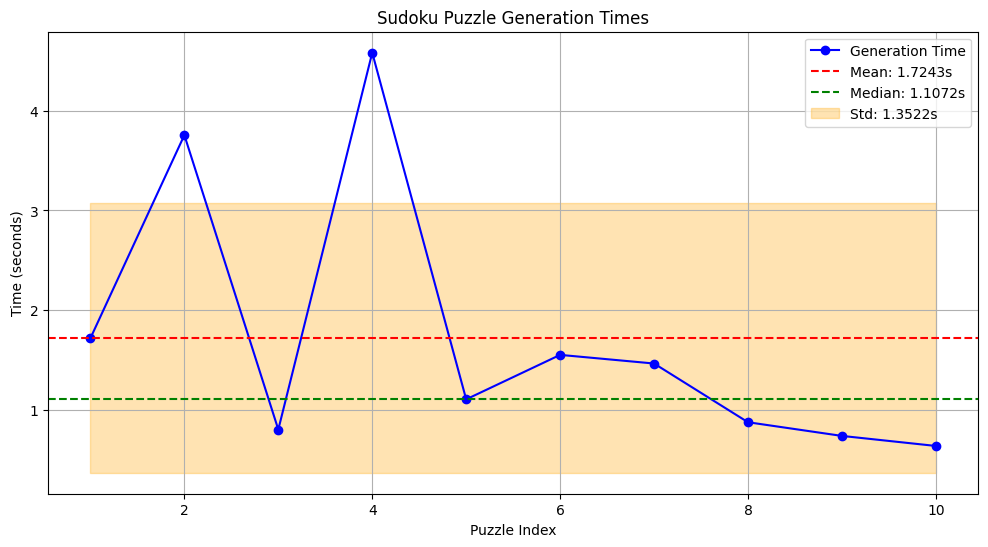

torch.Size([10, 9, 9]) torch.Size([10, 9, 9])


In [3]:
import random
import torch
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Ensure matplotlib plots inline in the Jupyter notebook
%matplotlib inline

class SudokuGenerator:
    def __init__(self):
        self.base = 3  # Size of the base Sudoku grid (for a 9x9 grid)
        self.side = self.base * self.base
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Use CUDA if available

    # Create a full solution using a backtracking algorithm
    def solve(self, grid):
        find = self.find_empty(grid)
        if not find:
            return True  # Solved
        row, col = find

        for num in range(1, self.side + 1):
            if self.is_safe(grid, num, row, col):
                grid[row][col] = num

                if self.solve(grid):
                    return True

                grid[row][col] = 0

        return False

    # Check if it's safe to place a number in a given cell
    def is_safe(self, grid, num, row, col):
        if num in grid[row]:
            return False
        if num in [grid[i][col] for i in range(self.side)]:
            return False
        box_x = row // self.base * self.base
        box_y = col // self.base * self.base
        for i in range(self.base):
            for j in range(self.base):
                if grid[box_x + i][box_y + j] == num:
                    return False
        return True

    # Find the next empty cell
    def find_empty(self, grid):
        for i in range(self.side):
            for j in range(self.side):
                if grid[i][j] == 0:
                    return (i, j)
        return None

    # Generate a fully solved grid
    def generate_solution_grid(self):
        grid = torch.zeros((self.side, self.side), dtype=torch.int8, device=self.device)  # Use CUDA tensor
        self.fill_diagonal_boxes(grid)
        self.solve(grid)
        return grid

    # Fill the diagonal 3x3 boxes with random numbers
    def fill_diagonal_boxes(self, grid):
        for i in range(0, self.side, self.base):
            self.fill_box(grid, i, i)

    # Fill a 3x3 box
    def fill_box(self, grid, row, col):
        numbers = list(range(1, self.side + 1))
        random.shuffle(numbers)
        for i in range(self.base):
            for j in range(self.base):
                grid[row + i][col + j] = numbers.pop()

    # Remove numbers to create the puzzle
    def remove_numbers(self, grid, num_holes):
        puzzle = grid.clone()  # Create a copy of the grid
        count = num_holes
        while count > 0:
            row = random.randint(0, self.side - 1)
            col = random.randint(0, self.side - 1)
            if puzzle[row][col] != 0:
                puzzle[row][col] = 0
                count -= 1
        return puzzle

    # Generate multiple puzzles and solutions as int8 tensors
    def generate_puzzles(self, num_puzzles=5):
        puzzles = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8, device=self.device)
        solutions = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8, device=self.device)

        generation_times = []  # List to store generation times for each puzzle
        generated_count = 0  # Track the number of successfully generated puzzles

        while generated_count < num_puzzles:
            start_time = time.time()  # Record the start time for puzzle generation
            timeout = 6.0  # Timeout threshold in seconds

            try:
                solution = self.generate_solution_grid()
                if time.time() - start_time > timeout:
                    print(f"Puzzle generation skipped due to timeout.")
                    continue

                num_holes = random.randint(12, 40)  # Random number of holes between 12 and 40
                puzzle = self.remove_numbers(solution, num_holes)
                puzzles[generated_count] = puzzle
                solutions[generated_count] = solution

                end_time = time.time()  # Record the end time for puzzle generation
                elapsed_time = end_time - start_time  # Calculate elapsed time
                generation_times.append(elapsed_time)  # Append time to list
                generated_count += 1  # Increment the count of successfully generated puzzles

                # Convert to tensor for calculations
                generation_times_tensor = torch.tensor(generation_times, device=self.device, dtype=torch.float)

                # Calculate mean, standard deviation, and median using PyTorch
                mean_time = generation_times_tensor.mean().item()
                std_time = generation_times_tensor.std().item()
                median_time = generation_times_tensor.median().item()

                # Print the time taken for each puzzle and current mean, std, and median
                print(f"Puzzle {generated_count} generated in {elapsed_time:.4f} seconds. "
                      f"Mean Time: {mean_time:.4f}s, Std: {std_time:.4f}s, Median: {median_time:.4f}s")

                # Live updating of the plot
                fig, ax = plt.subplots(figsize=(12, 6))  # Create a figure and axis object
                ax.plot(range(1, len(generation_times) + 1), generation_times, marker='o', color='b', label='Generation Time')
                ax.axhline(mean_time, color='r', linestyle='--', label=f'Mean: {mean_time:.4f}s')
                ax.axhline(median_time, color='g', linestyle='--', label=f'Median: {median_time:.4f}s')
                ax.fill_between(range(1, len(generation_times) + 1), 
                                 mean_time - std_time, 
                                 mean_time + std_time, 
                                 color='orange', alpha=0.3, label=f'Std: {std_time:.4f}s')

                ax.set_title('Sudoku Puzzle Generation Times')
                ax.set_xlabel('Puzzle Index')
                ax.set_ylabel('Time (seconds)')
                ax.legend()
                ax.grid(True)
                clear_output(wait=True)  # Clear previous plot
                display(fig)  # Display the current plot
                plt.close(fig)  # Close the figure to avoid retaining old plots

            except TimeoutError:
                print(f"Puzzle generation skipped due to exceeding time limit.")
                continue

        return puzzles, solutions

# Example usage
sudoku = SudokuGenerator()
puzzles, solutions = sudoku.generate_puzzles(num_puzzles=10)

print(puzzles.size(), solutions.size())


In [5]:
import random
import torch
import time
from concurrent.futures import ProcessPoolExecutor

class SudokuGenerator:
    def __init__(self):
        self.base = 3  # Size of the base Sudoku grid (for a 9x9 grid)
        self.side = self.base * self.base
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Use CUDA if available

    def solve(self, grid):
        find = self.find_empty(grid)
        if not find:
            return True  # Solved
        row, col = find

        for num in range(1, self.side + 1):
            if self.is_safe(grid, num, row, col):
                grid[row][col] = num

                if self.solve(grid):
                    return True

                grid[row][col] = 0

        return False

    def is_safe(self, grid, num, row, col):
        if num in grid[row]:
            return False
        if num in [grid[i][col] for i in range(self.side)]:
            return False
        box_x = row // self.base * self.base
        box_y = col // self.base * self.base
        for i in range(self.base):
            for j in range(self.base):
                if grid[box_x + i][box_y + j] == num:
                    return False
        return True

    def find_empty(self, grid):
        for i in range(self.side):
            for j in range(self.side):
                if grid[i][j] == 0:
                    return (i, j)
        return None

    def generate_solution_grid(self):
        grid = torch.zeros((self.side, self.side), dtype=torch.int8, device=self.device)
        self.fill_diagonal_boxes(grid)
        self.solve(grid)
        return grid

    def fill_diagonal_boxes(self, grid):
        for i in range(0, self.side, self.base):
            self.fill_box(grid, i, i)

    def fill_box(self, grid, row, col):
        numbers = list(range(1, self.side + 1))
        random.shuffle(numbers)
        for i in range(self.base):
            for j in range(self.base):
                grid[row + i][col + j] = numbers.pop()

    def remove_numbers(self, grid, num_holes):
        puzzle = grid.clone()
        count = num_holes
        while count > 0:
            row = random.randint(0, self.side - 1)
            col = random.randint(0, self.side - 1)
            if puzzle[row][col] != 0:
                puzzle[row][col] = 0
                count -= 1
        return puzzle

    def generate_single_puzzle(self):
        solution = self.generate_solution_grid()
        num_holes = random.randint(12, 40)
        puzzle = self.remove_numbers(solution, num_holes)
        return puzzle, solution

    def generate_puzzles(self, num_puzzles=5):
        puzzles = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8, device=self.device)
        solutions = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8, device=self.device)

        for idx in range(num_puzzles):
            puzzle, solution = self.generate_single_puzzle()
            puzzles[idx] = puzzle
            solutions[idx] = solution
            print(f"Puzzle {idx + 1} generated.")

        return puzzles, solutions

# Example usage
if __name__ == "__main__":
    sudoku = SudokuGenerator()
    puzzles, solutions = sudoku.generate_puzzles(num_puzzles=10)

    print(puzzles.size(), solutions.size())


Puzzle 1 generated.
Puzzle 2 generated.
Puzzle 3 generated.
Puzzle 4 generated.
Puzzle 5 generated.
Puzzle 6 generated.
Puzzle 7 generated.
Puzzle 8 generated.
Puzzle 9 generated.


KeyboardInterrupt: 

In [1]:
import random
import torch
from concurrent.futures import ThreadPoolExecutor

class SudokuGenerator:
    def __init__(self):
        self.base = 3  # Size of the base Sudoku grid (for a 9x9 grid)
        self.side = self.base * self.base

    def solve(self, grid):
        find = self.find_empty(grid)
        if not find:
            return True  # Solved
        row, col = find

        for num in range(1, self.side + 1):
            if self.is_safe(grid, num, row, col):
                grid[row][col] = num

                if self.solve(grid):
                    return True

                grid[row][col] = 0

        return False

    def is_safe(self, grid, num, row, col):
        if num in grid[row]:
            return False
        if num in [grid[i][col] for i in range(self.side)]:
            return False
        box_x = row // self.base * self.base
        box_y = col // self.base * self.base
        for i in range(self.base):
            for j in range(self.base):
                if grid[box_x + i][box_y + j] == num:
                    return False
        return True

    def find_empty(self, grid):
        for i in range(self.side):
            for j in range(self.side):
                if grid[i][j] == 0:
                    return (i, j)
        return None

    def generate_solution_grid(self):
        grid = torch.zeros((self.side, self.side), dtype=torch.int8)  # Use CPU tensor
        self.fill_diagonal_boxes(grid)
        self.solve(grid)
        return grid

    def fill_diagonal_boxes(self, grid):
        for i in range(0, self.side, self.base):
            self.fill_box(grid, i, i)

    def fill_box(self, grid, row, col):
        numbers = list(range(1, self.side + 1))
        random.shuffle(numbers)
        for i in range(self.base):
            for j in range(self.base):
                grid[row + i][col + j] = numbers.pop()

    def remove_numbers(self, grid, num_holes):
        puzzle = grid.clone()
        count = num_holes
        while count > 0:
            row = random.randint(0, self.side - 1)
            col = random.randint(0, self.side - 1)
            if puzzle[row][col] != 0:
                puzzle[row][col] = 0
                count -= 1
        return puzzle

    def generate_single_puzzle(self):
        solution = self.generate_solution_grid()
        num_holes = random.randint(12, 40)
        puzzle = self.remove_numbers(solution, num_holes)
        return puzzle, solution

    def generate_puzzles(self, num_puzzles=5):
        puzzles = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8)
        solutions = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8)

        with ThreadPoolExecutor(max_workers=10) as executor:
            futures = [executor.submit(self.generate_single_puzzle) for _ in range(num_puzzles)]
            for idx, future in enumerate(futures):
                puzzle, solution = future.result()
                puzzles[idx] = puzzle
                solutions[idx] = solution
                print(f"Puzzle {idx + 1} generated.")

        return puzzles, solutions

# Example usage
if __name__ == "__main__":
    sudoku = SudokuGenerator()
    puzzles, solutions = sudoku.generate_puzzles(num_puzzles=1000)

    print(puzzles.size(), solutions.size())


Puzzle 1 generated.
Puzzle 2 generated.
Puzzle 3 generated.
Puzzle 4 generated.
Puzzle 5 generated.
Puzzle 6 generated.


In [1]:
import random
import torch
from concurrent.futures import ThreadPoolExecutor, TimeoutError

class SudokuGenerator:
    def __init__(self):
        self.base = 3  # Size of the base Sudoku grid (for a 9x9 grid)
        self.side = self.base * self.base

    def solve(self, grid):
        find = self.find_empty(grid)
        if not find:
            return True  # Solved
        row, col = find

        for num in range(1, self.side + 1):
            if self.is_safe(grid, num, row, col):
                grid[row][col] = num

                if self.solve(grid):
                    return True

                grid[row][col] = 0

        return False

    def is_safe(self, grid, num, row, col):
        if num in grid[row]:
            return False
        if num in [grid[i][col] for i in range(self.side)]:
            return False
        box_x = row // self.base * self.base
        box_y = col // self.base * self.base
        for i in range(self.base):
            for j in range(self.base):
                if grid[box_x + i][box_y + j] == num:
                    return False
        return True

    def find_empty(self, grid):
        for i in range(self.side):
            for j in range(self.side):
                if grid[i][j] == 0:
                    return (i, j)
        return None

    def generate_solution_grid(self):
        grid = torch.zeros((self.side, self.side), dtype=torch.int8)  # Use CPU tensor
        self.fill_diagonal_boxes(grid)
        self.solve(grid)
        return grid

    def fill_diagonal_boxes(self, grid):
        for i in range(0, self.side, self.base):
            self.fill_box(grid, i, i)

    def fill_box(self, grid, row, col):
        numbers = list(range(1, self.side + 1))
        random.shuffle(numbers)
        for i in range(self.base):
            for j in range(self.base):
                grid[row + i][col + j] = numbers.pop()

    def remove_numbers(self, grid, num_holes):
        puzzle = grid.clone()
        count = num_holes
        while count > 0:
            row = random.randint(0, self.side - 1)
            col = random.randint(0, self.side - 1)
            if puzzle[row][col] != 0:
                puzzle[row][col] = 0
                count -= 1
        return puzzle

    def generate_single_puzzle(self):
        solution = self.generate_solution_grid()
        num_holes = random.randint(12, 40)
        puzzle = self.remove_numbers(solution, num_holes)
        return puzzle, solution

    def generate_puzzles(self, num_puzzles=5):
        puzzles = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8)
        solutions = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8)

        with ThreadPoolExecutor(max_workers=14) as executor:
            futures = [executor.submit(self.generate_single_puzzle) for _ in range(num_puzzles)]
            for idx, future in enumerate(futures):
                try:
                    puzzle, solution = future.result(timeout=2)  # 6 seconds timeout
                    puzzles[idx] = puzzle
                    solutions[idx] = solution
                    print(f"Puzzle {idx + 1} generated.")
                except TimeoutError:
                    print(f"Puzzle {idx + 1} generation timed out.")

        return puzzles, solutions

# Example usage
if __name__ == "__main__":
    sudoku = SudokuGenerator()
    puzzles, solutions = sudoku.generate_puzzles(num_puzzles=100)

    print(puzzles.size(), solutions.size())


Puzzle 1 generated.
Puzzle 2 generated.
Puzzle 3 generated.
Puzzle 4 generation timed out.
Puzzle 5 generated.
Puzzle 6 generated.
Puzzle 7 generated.
Puzzle 8 generated.
Puzzle 9 generated.
Puzzle 10 generated.
Puzzle 11 generated.
Puzzle 12 generated.
Puzzle 13 generation timed out.
Puzzle 14 generated.
Puzzle 15 generated.
Puzzle 16 generation timed out.
Puzzle 17 generation timed out.
Puzzle 18 generated.
Puzzle 19 generated.
Puzzle 20 generated.
Puzzle 21 generated.
Puzzle 22 generated.
Puzzle 23 generated.
Puzzle 24 generated.
Puzzle 25 generated.
Puzzle 26 generated.
Puzzle 27 generated.
Puzzle 28 generated.
Puzzle 29 generated.
Puzzle 30 generation timed out.
Puzzle 31 generated.
Puzzle 32 generated.
Puzzle 33 generation timed out.
Puzzle 34 generated.
Puzzle 35 generated.
Puzzle 36 generated.
Puzzle 37 generated.
Puzzle 38 generation timed out.
Puzzle 39 generated.
Puzzle 40 generated.
Puzzle 41 generated.
Puzzle 42 generation timed out.
Puzzle 43 generated.
Puzzle 44 generate

In [2]:
import random
import torch
from concurrent.futures import ThreadPoolExecutor, TimeoutError
import time

class SudokuGenerator:
    def __init__(self):
        self.base = 3  # Size of the base Sudoku grid
        self.side = self.base * self.base
        self.times = []

    def solve(self, grid, row, col, num):
        for n in range(1, self.side + 1):
            if self.is_safe(grid, n, row, col):
                grid[row][col] = n
                if self.solve(grid, *self.find_empty(grid)):
                    return True
                grid[row][col] = 0
        return False

    def is_safe(self, grid, num, row, col):
        return (num not in grid[row] and 
                num not in grid[:, col] and 
                num not in grid[row // self.base * self.base: (row // self.base + 1) * self.base,
                               col // self.base * self.base: (col // self.base + 1) * self.base])

    def generate_solution_grid(self):
        grid = torch.zeros((self.side, self.side), dtype=torch.int8)
        self.fill_diagonal_boxes(grid)
        self.solve(grid, 0, 0, None)
        return grid

    def fill_diagonal_boxes(self, grid):
        for i in range(0, self.side, self.base):
            self.fill_box(grid, i, i)

    def fill_box(self, grid, row, col):
        numbers = list(range(1, self.side + 1))
        random.shuffle(numbers)
        for i in range(self.base):
            for j in range(self.base):
                grid[row + i][col + j] = numbers.pop()

    def remove_numbers(self, grid, num_holes):
        puzzle = grid.clone()
        cells = list(range(self.side * self.side))
        random.shuffle(cells)

        for index in cells[:num_holes]:
            row, col = divmod(index, self.side)
            puzzle[row][col] = 0

        return puzzle

    def generate_single_puzzle(self):
        start_time = time.time()
        solution = self.generate_solution_grid()
        num_holes = random.randint(12, 40)
        puzzle = self.remove_numbers(solution, num_holes)
        elapsed_time = time.time() - start_time
        self.times.append(elapsed_time)
        return puzzle, solution

    def generate_puzzles(self, num_puzzles=5):
        puzzles = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8)
        solutions = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8)

        with ThreadPoolExecutor(max_workers=14) as executor:
            futures = [executor.submit(self.generate_single_puzzle) for _ in range(num_puzzles)]
            for idx, future in enumerate(futures):
                try:
                    puzzle, solution = future.result(timeout=6)
                    puzzles[idx] = puzzle
                    solutions[idx] = solution
                except TimeoutError:
                    print(f"Puzzle {idx + 1} generation timed out.")
        
        return puzzles, solutions

# Example usage
if __name__ == "__main__":
    sudoku = SudokuGenerator()
    puzzles, solutions = sudoku.generate_puzzles(num_puzzles=1000)
    print(puzzles.size(), solutions.size())


torch.Size([1000, 9, 9]) torch.Size([1000, 9, 9])


In [3]:
# Reshape the tensor to 1000 x 81 (9*9=81)
reshaped_tensor = solutions.view(solutions.size(0), -1)

# Get unique rows and their indices
unique_rows, indices = torch.unique(reshaped_tensor, dim=0, return_inverse=True)

# Check for duplicates
duplicates = torch.bincount(indices) > 1

# Get the indices of duplicate rows
duplicate_indices = duplicates.nonzero(as_tuple=True)[0]

# Print results
print("Duplicate rows found at indices:", duplicate_indices)

Duplicate rows found at indices: tensor([], dtype=torch.int64)


In [5]:
import random
import torch
from concurrent.futures import ThreadPoolExecutor, TimeoutError
import time
from tqdm import tqdm  # Import tqdm for the loading bar

class SudokuGenerator:
    def __init__(self):
        self.base = 3  # Size of the base Sudoku grid
        self.side = self.base * self.base
        self.times = []

    def solve(self, grid):
        empty_cells = [(r, c) for r in range(self.side) for c in range(self.side) if grid[r][c] == 0]
        if not empty_cells:
            return True  # Solved

        row, col = empty_cells[0]  # Get the first empty cell

        for n in range(1, self.side + 1):
            if self.is_safe(grid, n, row, col):
                grid[row][col] = n
                if self.solve(grid):
                    return True
                grid[row][col] = 0  # Reset on backtrack

        return False

    def is_safe(self, grid, num, row, col):
        return (num not in grid[row] and 
                num not in grid[:, col] and 
                num not in grid[row // self.base * self.base: (row // self.base + 1) * self.base,
                               col // self.base * self.base: (col // self.base + 1) * self.base])

    def generate_solution_grid(self):
        grid = torch.zeros((self.side, self.side), dtype=torch.int8)
        self.fill_diagonal_boxes(grid)
        self.solve(grid)
        return grid

    def fill_diagonal_boxes(self, grid):
        for i in range(0, self.side, self.base):
            self.fill_box(grid, i, i)

    def fill_box(self, grid, row, col):
        numbers = list(range(1, self.side + 1))
        random.shuffle(numbers)
        for i in range(self.base):
            for j in range(self.base):
                grid[row + i][col + j] = numbers.pop()

    def remove_numbers(self, grid, num_holes):
        puzzle = grid.clone()
        cells = list(range(self.side * self.side))
        random.shuffle(cells)

        for index in cells[:num_holes]:
            row, col = divmod(index, self.side)
            puzzle[row][col] = 0

        return puzzle

    def generate_single_puzzle(self):
        start_time = time.time()
        solution = self.generate_solution_grid()
        num_holes = random.randint(12, 40)
        puzzle = self.remove_numbers(solution, num_holes)
        elapsed_time = time.time() - start_time
        self.times.append(elapsed_time)
        return puzzle, solution

    def generate_puzzles(self, num_puzzles=5):
        puzzles = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8)
        solutions = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8)

        with ThreadPoolExecutor(max_workers=12) as executor:
            futures = [executor.submit(self.generate_single_puzzle) for _ in range(num_puzzles)]
            for idx in tqdm(range(num_puzzles), desc="Generating puzzles", unit="puzzle"):
                future = futures[idx]
                try:
                    puzzle, solution = future.result(timeout=6)
                    puzzles[idx] = puzzle
                    solutions[idx] = solution
                except TimeoutError:
                    print(f"Puzzle {idx + 1} generation timed out.")
        
        return puzzles, solutions

# Example usage
if __name__ == "__main__":
    sudoku = SudokuGenerator()
    puzzles, solutions = sudoku.generate_puzzles(num_puzzles=100)
    print(puzzles.size(), solutions.size())


Generating puzzles:   1%|          | 1/100 [00:06<09:54,  6.01s/puzzle]

Puzzle 1 generation timed out.


Generating puzzles:  12%|█▏        | 12/100 [00:12<01:24,  1.04puzzle/s]

Puzzle 12 generation timed out.


Generating puzzles:  14%|█▍        | 14/100 [00:18<02:02,  1.43s/puzzle]

Puzzle 14 generation timed out.


Generating puzzles:  15%|█▌        | 15/100 [00:24<02:55,  2.07s/puzzle]

Puzzle 15 generation timed out.


Generating puzzles:  26%|██▌       | 26/100 [00:30<01:15,  1.02s/puzzle]

Puzzle 26 generation timed out.


Generating puzzles:  30%|███       | 30/100 [00:36<01:20,  1.15s/puzzle]

Puzzle 30 generation timed out.


Generating puzzles:  36%|███▌      | 36/100 [00:42<01:10,  1.10s/puzzle]

Puzzle 36 generation timed out.


Generating puzzles:  37%|███▋      | 37/100 [00:48<01:33,  1.48s/puzzle]

Puzzle 37 generation timed out.


Generating puzzles:  45%|████▌     | 45/100 [00:59<01:18,  1.43s/puzzle]

Puzzle 45 generation timed out.


Generating puzzles:  47%|████▋     | 47/100 [01:05<01:30,  1.71s/puzzle]

Puzzle 47 generation timed out.


Generating puzzles:  48%|████▊     | 48/100 [01:11<01:54,  2.20s/puzzle]

Puzzle 48 generation timed out.


Generating puzzles:  51%|█████     | 51/100 [01:17<01:44,  2.14s/puzzle]

Puzzle 51 generation timed out.


Generating puzzles:  55%|█████▌    | 55/100 [01:23<01:25,  1.89s/puzzle]

Puzzle 55 generation timed out.


Generating puzzles:  64%|██████▍   | 64/100 [01:29<00:43,  1.22s/puzzle]

Puzzle 64 generation timed out.


Generating puzzles:  84%|████████▍ | 84/100 [01:41<00:18,  1.13s/puzzle]

Puzzle 84 generation timed out.


Generating puzzles:  90%|█████████ | 90/100 [01:52<00:19,  1.95s/puzzle]

Puzzle 90 generation timed out.


Generating puzzles:  93%|█████████▎| 93/100 [01:58<00:13,  1.97s/puzzle]

Puzzle 93 generation timed out.


Generating puzzles:  94%|█████████▍| 94/100 [02:04<00:15,  2.62s/puzzle]

Puzzle 94 generation timed out.


Generating puzzles: 100%|██████████| 100/100 [02:19<00:00,  1.40s/puzzle]


KeyboardInterrupt: 

In [1]:
import random
import torch
from concurrent.futures import ThreadPoolExecutor, TimeoutError
import time

class SudokuGenerator:
    def __init__(self):
        self.base = 3  # Size of the base Sudoku grid
        self.side = self.base * self.base
        self.times = []

    def solve(self, grid):
        empty_cells = [(r, c) for r in range(self.side) for c in range(self.side) if grid[r][c] == 0]
        if not empty_cells:
            return True  # Solved

        row, col = empty_cells[0]  # Get the first empty cell
        candidates = list(range(1, self.side + 1))
        random.shuffle(candidates)  # Shuffle candidates for better performance

        for n in candidates:
            if self.is_safe(grid, n, row, col):
                grid[row][col] = n
                if self.solve(grid):
                    return True
                grid[row][col] = 0  # Reset on backtrack

        return False

    def is_safe(self, grid, num, row, col):
        row_set = set(grid[row].tolist())
        col_set = set(grid[:, col].tolist())
        box_set = set(grid[row // self.base * self.base: (row // self.base + 1) * self.base,
                           col // self.base * self.base: (col // self.base + 1) * self.base].flatten().tolist())
        return (num not in row_set and num not in col_set and num not in box_set)

    def generate_solution_grid(self):
        grid = torch.zeros((self.side, self.side), dtype=torch.int8)
        self.fill_diagonal_boxes(grid)
        self.solve(grid)
        return grid

    def fill_diagonal_boxes(self, grid):
        for i in range(0, self.side, self.base):
            self.fill_box(grid, i, i)

    def fill_box(self, grid, row, col):
        numbers = list(range(1, self.side + 1))
        random.shuffle(numbers)
        for i in range(self.base):
            for j in range(self.base):
                grid[row + i][col + j] = numbers.pop()

    def remove_numbers(self, grid, num_holes):
        puzzle = grid.clone()
        cells = list(range(self.side * self.side))
        random.shuffle(cells)

        for index in cells[:num_holes]:
            row, col = divmod(index, self.side)
            puzzle[row][col] = 0

        return puzzle

    def generate_single_puzzle(self):
        start_time = time.time()
        solution = self.generate_solution_grid()
        num_holes = random.randint(12, 40)
        puzzle = self.remove_numbers(solution, num_holes)
        elapsed_time = time.time() - start_time
        self.times.append(elapsed_time)
        return puzzle, solution

    def generate_puzzles(self, num_puzzles=5):
        puzzles = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8)
        solutions = torch.zeros((num_puzzles, self.side, self.side), dtype=torch.int8)

        with ThreadPoolExecutor(max_workers=20) as executor:
            futures = [executor.submit(self.generate_single_puzzle) for _ in range(num_puzzles)]
            for idx in range(num_puzzles):
                future = futures[idx]
                try:
                    puzzle, solution = future.result(timeout=3)
                    puzzles[idx] = puzzle
                    solutions[idx] = solution
                except TimeoutError:
                    pass
                    #print(f"Puzzle {idx + 1} generation timed out.")
        
        return puzzles, solutions

# Example usage
if __name__ == "__main__":
    sudoku = SudokuGenerator()
    puzzles, solutions = sudoku.generate_puzzles(num_puzzles=100)
    print(puzzles.size(), solutions.size())
